In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ***W1+2: Linear Regression***

In [ ]:
theta = np.array([[0.3]])
theta_0 = 1

In [4]:
def f_real(X):
  return 0.05 * X**2 - 0.5*X + 1.5

X = np.random.randint(1, 30, 20)
y = f_real(X)

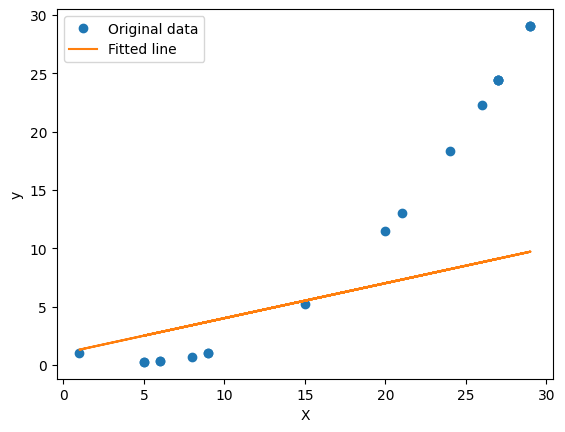

In [ ]:
y_pred = (theta * X + theta_0).flatten()

plt.plot(X, y, 'o', label='Original data')
plt.plot(X, y_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [ ]:
X = X.reshape(-1, 1) #n x 1

In [ ]:
X.shape, theta.shape

((20, 1), (1, 1))

## **Training error (RMSE) for linear regression**

In [ ]:
n = X.shape[0]
y_pred = theta.T @ X + theta_0

ValueError: shapes (1,1) and (20,1) not aligned: 1 (dim 1) != 20 (dim 0)

`prompt: hint to write traning error of linear regression (no code)`

import numpy as np
The training error of a linear regression model is typically calculated as the mean squared error (MSE) between the predicted values (y_pred) and the actual values (y) in your training dataset.  You've already got most of the pieces:

1. **Calculate the difference between predicted and actual values:**  `y_pred - y`

2. **Square the differences:**  `(y_pred - y)**2`

3. **Sum the squared differences:** `np.sum((y_pred - y)**2)`

4. **Divide by the number of data points (n):** `1/n * ...`

You're very close with the code you've already written! The issue lies in how you're using `theta`.  You need to ensure the matrix multiplication is correctly sized and that you're adding `theta_0` correctly.  Review the dimensions of `theta` and `X`, and how you incorporate the intercept (`theta_0`).


In [ ]:
y_pred = theta.T @ X.T + theta_0

### Mistake 1: transpose X because of wrong dimension when initialized

In [ ]:
def RMSE_1(theta, theta_0, X, y):
  X = X.reshape(-1, 1) #n x 1
  y_pred = theta.T @ X.T + theta_0
  n = X.shape[0]
  mse = (1 / n) * np.sum((y_pred.flatten() - y)**2)
  return mse

# Example usage:
error = RMSE_1(theta, theta_0, X, y)
print(f"Training Error (MSE): {error}")

Training Error (MSE): 122.37075000000004


## **Direct Solution**

### Mistake 2: Careful about matrix dimension

Optimal theta of direct solution: [ 1.00229503 -5.63308956]
Validation error of direct solution:  12.238927492591925
Validation error of direct solution:  12.238927492591927


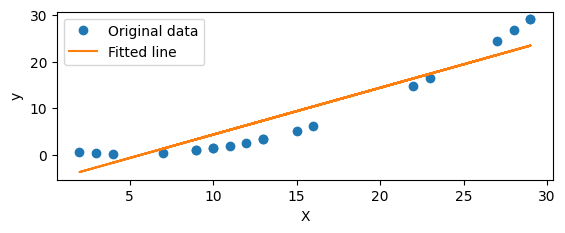


Optimal theta using numpy.linalg.lstsq: [ 1.00229503 -5.63308956]
Validation error of least square:  12.238927492591923
Validation error of least square:  12.238927492591923


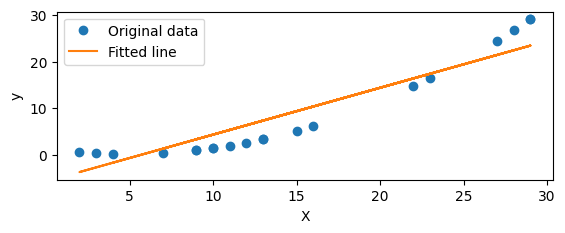

In [12]:
#theta = X^(-1) * y
def direct_linear_regression_1(X, y):
  X = X.reshape(-1, 1)
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  theta_best = np.linalg.pinv(X_b) @ y
  return theta_best

#theta = (X^T @ X)^(-1) @ X^T @ y
def direct_linear_regression_2(X, y):
  X = X.reshape(-1, 1)
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y #np.linalg.inv(X_b.T.dot(X_b)) may not be defined
  return theta_best

def RMSE_1_rewrite(theta, X, y):
  theta_0 = theta[1]
  theta = np.delete(np.array(theta), theta.shape[0]-1) #delete last column reserved for theta_0
  theta = np.array(theta)
  X = X.reshape(-1, 1) #n x 1
  n = X.shape[0]

  y_pred = theta.T @ X.T + theta_0
  mse = (1 / n) * np.sum((y_pred.flatten() - y)**2)
  return mse

#err = 1/n * (X_b @ theta - y).T @ (X_b @ theta - y)
def RMSE_2(theta, X, y):
  X = X.reshape(-1, 1) #n x d
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  n = X.shape[0]
  y = y.reshape(-1, 1) #n x 1
  theta = theta.reshape(-1, 1) #d * 1

  dif = X_b @ theta - y
  dif_T = dif.T
  err = (1 / n) * np.sum(dif_T @ dif)
  # print(dif)
  # print(X_b, theta, y)
  return err

# Test RMSE function with fixed X, y and theta
# print(RMSE_1_rewrite(np.array([1, 2]), np.array([[1, 3]]), np.array([1, 2])))
# print(RMSE_2(np.array([1, 2]), np.array([[1, 3]]), np.array([1, 2])))

# Training set
X = np.random.randint(1, 30, 20)
X_b = np.c_[X, np.ones((len(X), 1))]
y = f_real(X)

# Valuation set
X_val = np.random.randint(1, 30, 20)
X_val_b = np.c_[X_val, np.ones((len(X_val), 1))]
y_val = f_real(X_val)

# theta_best = direct_linear_regression_1(X, y)
theta_best = direct_linear_regression_2(X, y)
y_val_pred = X_val_b @ theta_best
print("Optimal theta of direct solution:", theta_best)
print("Validation error of direct solution: ", RMSE_1_rewrite(theta_best, X_val, y_val))
print("Validation error of direct solution: ", RMSE_2(theta_best, X_val, y_val))
plt.subplot(2, 1, 1)
plt.plot(X_val, y_val, 'o', label='Original data')
plt.plot(X_val, y_val_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Compare with the solution using numpy.linalg.lstsq (least squares)
theta_best_lstsq, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
y_val_pred = X_val_b @ theta_best_lstsq
print("\nOptimal theta using numpy.linalg.lstsq:", theta_best_lstsq.flatten())
print("Validation error of least square: ", RMSE_1_rewrite(theta_best_lstsq, X_val, y_val))
print("Validation error of least square: ", RMSE_2(theta_best_lstsq, X_val, y_val))
plt.subplot(2, 1, 2)
plt.plot(X_val, y_val, 'o', label='Original data')
plt.plot(X_val, y_val_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

**Same error => Correct implementation**

## Ridge

Optimal theta of linear regression: [ 1.03766286 -7.90958662]
Validation error of linear regression:  10.163245312570645


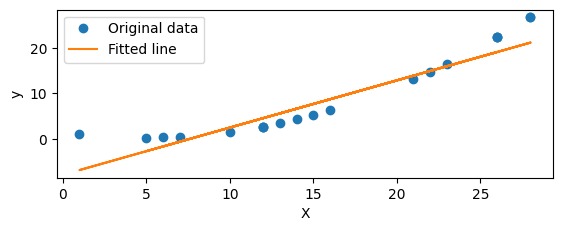


Optimal theta using ridge regression: [ 1.02444122 -6.26548574]
Validation error normal of ridge regression:  9.691265569534263
Validation error ridge of ridge regression:  10.094323483322201


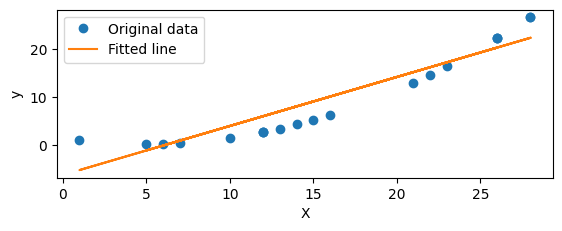

In [ ]:
#theta = (X^T x X)^(-1) x X^T x y
def direct_ridge_regression(X, y, c):
  X = X.reshape(-1, 1) #n x d
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  n, d = X.shape[0], X.shape[1]
  theta_best = np.linalg.inv(X_b.T @ X_b + n * c * np.identity(d)) @ X_b.T @ y #np.linalg.inv(X_b.T.dot(X_b)) may not be defined
  return theta_best

def RMSE_ridge(theta, X, y, c):
  X = X.reshape(-1, 1) #n x d
  X_b = np.c_[X, np.ones((len(X), 1))] #1 column for theta_0
  n = X.shape[0]
  y = y.reshape(-1, 1) #n x 1
  theta = theta.reshape(-1, 1) #d * 1

  dif = X_b @ theta - y
  dif_T = dif.T
  err = 1/n * np.sum(dif_T @ dif) + c * np.linalg.norm(theta)**2
  return err

X = np.random.randint(1, 30, 20)
y = f_real(X)

X_val = np.random.randint(1, 30, 20)
X_val_b = np.c_[X_val, np.ones((len(X_val), 1))]
y_val = f_real(X_val)

c = 0.01
theta_best_normal = direct_linear_regression_2(X, y)
y_val_pred = X_val_b @ theta_best
print("Optimal theta of linear regression:", theta_best)
print("Validation error of linear regression: ", RMSE_2(theta_best, X_val, y_val))
plt.subplot(2, 1, 1)
plt.plot(X_val, y_val, 'o', label='Original data')
plt.plot(X_val, y_val_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

theta_best_ridge = direct_ridge_regression(X, y, c)
y_val_pred = X_val_b @ theta_best_ridge
print("\nOptimal theta using ridge regression:", theta_best_ridge.flatten())
print("Validation error normal of ridge regression: ", RMSE_2(theta_best_ridge, X_val, y_val))
print("Validation error ridge of ridge regression: ", RMSE_ridge(theta_best_ridge, X_val, y_val, c))
plt.subplot(2, 1, 2)
plt.plot(X_val, y_val, 'o', label='Original data')
plt.plot(X_val, y_val_pred, '-', label='Fitted line')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# W3: Gradient Descent

## Batch Gradient Descent

In [62]:
lr = 1e-3
n_epochs = 1000
theta = np.random.randn(2, 1)

X = np.random.randint(1, 30, 20).reshape(-1, 1)
X_b = np.c_[X, np.ones((len(X), 1))]
y = f_real(X)
n = len(X_b)

def batch_gradient_descent(theta, X, y, n_epochs = 100, lr = 1e-3):
  X_b = np.c_[X, np.ones((len(X), 1))]
  for epoch in range(n_epochs):
    gradient = (2 / n) * X_b.T @ (X_b @ theta - y)
    theta = theta - lr * gradient
  return theta

def batch_gradient_descent_2(theta, X, y, lr = 1e-3, eps = 1e-10):
  prev_err, cur_err = 0, RMSE_2(theta, X, y)
  X_b = np.c_[X, np.ones((len(X), 1))]
  while cur_err - prev_err > eps:
    prev_err = cur_err
    gradient = (2 / n) * X_b.T @ (X_b @ theta - y)
    theta = theta - lr * gradient
    cur_err = RMSE_2(theta, X, y)
  return theta

print("Before: ", RMSE_2(theta, X, y))

theta_tmp = batch_gradient_descent(theta, X, y, n_epochs, lr)
print("After Batch Gradient Descent (1000 epochs): ", RMSE_2(theta_tmp, X, y))

eps = 1e-18
theta_tmp = batch_gradient_descent_2(theta, X, y, lr, eps)
print("After Batch Gradient Descent (early stopping): ", RMSE_2(theta_tmp, X, y))

Before:  19.122761730277343
After Batch Gradient Descent (1000 epochs):  10.579746406642561
After Batch Gradient Descent (early stopping):  15.095309659396856


## Stochastic Gradient Descent

In [114]:
lr = 1e-3
n_epochs = 1000
theta = np.random.randn(2, 1)

X = np.random.randint(1, 30, 20).reshape(-1, 1)
X_b = np.c_[X, np.ones((len(X), 1))]
y = f_real(X)
n = len(X_b)

def stochastic_gradient_descent(theta, X, y, n_epochs = 100, lr = 1e-3):
  for epoch in range(n_epochs):
    rnd_idx = np.random.randint(len(X))
    X_rnd, y_rnd = X[rnd_idx], y[rnd_idx]
    X_b_rnd = np.c_[X_rnd, np.ones((len(X_rnd), 1))]

    gradient = 2 * X_b_rnd.T @ (X_b_rnd @ theta - y_rnd)
    theta = theta - lr * gradient
  return theta

print("Before: ", RMSE_2(theta, X, y))
theta_b = batch_gradient_descent(theta, X, y, n_epochs, lr)
print("After Batch Gradient Descent (1000 epochs): ", RMSE_2(theta_b, X, y))
theta_s = stochastic_gradient_descent(theta, X, y, n_epochs, lr)
print("After Stochastic Gradient Descent (1000 epochs): ", RMSE_2(theta_s, X, y))

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-6, penalty=None, eta0=lr, n_iter_no_change=50, random_state=86)
sgd_reg.fit(X, y.ravel())
print("With sklearn SGDRegressor: ", RMSE_2(np.c_[sgd_reg.coef_, sgd_reg.intercept_].T, X, y))

Before:  18.652017831602794
After Batch Gradient Descent (1000 epochs):  5.2390666312928165
After Stochastic Gradient Descent (1000 epochs):  5.398374399599127
With sklearn SGDRegressor:  5.51230677933938


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1603: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
